# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Predictor and Target Variables

In order to build an effective machine learning model, it is important to select the appropriate predictor variables and to  prepare the data for an ML model.

![image.png](https://d2a032ejo53cab.cloudfront.net/Course/Units/Mcq/UnitContent/Vq3Q8ln8/Predicting-SPY-with-Decision-Tree.jpg)

In this notebook, you will learn to define and visualise various kinds of predictor variables that can be used to predict whether the future price of SPY will go up (1) or go down (0) on the upcoming day.

This notebook is structured as follows:
1. [Import Libraries](#libraries)
2. [Read the Data](#data)
3. [Define Predictor Variables](#predictor)
4. [Visualise the Features](#visualise)
5. [Define the Target Variable](#target)
6. [Conclusion and Next Steps](#conclusion)

<a id='libraries'></a>
## Import Libraries

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For technical analysis
import talib as ta

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

<a id='data'></a>
## Read the Data

Import the file `spy_daily_2009_2022.csv` using the `read_csv` method of `pandas`. This file has the OHLCV values for SPY in the daily frequency. This CSV file is available in the zip file of the unit 'Python Codes and Data' in the 'Course Summary' section.

In [2]:
# Import the SPY daily data
spy = pd.read_csv('../data_modules/spy_daily_2009_2022.csv', index_col=0)

# Change the index type to datetime
spy.index = pd.to_datetime(spy.index)

# Display the data
spy.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-23,373.384588,375.555631,369.667000,374.792297,79292100
2022-06-24,378.103436,386.718328,378.073696,386.708405,98050300
2022-06-27,387.670022,387.977340,384.091239,385.231293,66009600
2022-06-28,386.857107,389.761775,377.240936,377.359894,86548900
2022-06-29,377.934904,378.965893,375.149194,377.052582,65676000


<a id='predictor'></a>
## Define Predictor Variables

There are a variety of predictor variables that could potentially be used to predict the future returns of the S&P 500 index, represented by the SPY. For instance, past returns in itself can be a useful starting point for forecasting the labels corresponding to the future returns of the S&P 500.

### Past Returns

By examining the historical returns of the index, we can get a sense of the types of returns that have been achieved in the past and understand some factors that may have contributed to those returns. 

Let's calculate the historical returns over a range of different time intervals. We can calculate the returns over the past 1 day, 5 days, 10 days, 22 days, 44 days, and 88 days and use them as predictor variables. 

Note: The time intervals specified were chosen arbitrarily and you are free to change them as per your preference.

In [3]:
# Define time periods to calculate returns
intervals = [1, 5, 10, 22, 44, 88]

# Loop to calculate returns for time periods specified in 'intervals'
for t in intervals:
    # Create new columns for features in 'spy' and store the value of returns
    spy[f'f_ret_{t}'] = spy.Close.pct_change(t)
    
# Display the data
spy.tail()

,Open,High,Low,Close,Volume,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88
Date,,,,,,,,,,,
2022-06-23,373.384588,375.555631,369.667000,374.792297,79292100,0.009803,0.001300,-0.076667,-0.025503,-0.146201,-0.146217
2022-06-24,378.103436,386.718328,378.073696,386.708405,98050300,0.031794,0.068499,-0.024101,-0.012987,-0.105682,-0.120058
2022-06-27,387.670022,387.977340,384.091239,385.231293,66009600,-0.003820,0.062128,0.001202,-0.009194,-0.083962,-0.104285
2022-06-28,386.857107,389.761775,377.240936,377.359894,86548900,-0.020433,0.014877,0.019451,-0.037939,-0.107852,-0.116869
2022-06-29,377.934904,378.965893,375.149194,377.052582,65676000,-0.000814,0.015892,0.021700,-0.057554,-0.081992,-0.108016


An important point to note is that although the past returns of an asset can be used as input to predict its future returns, we should also consider a wide range of other factors in addition to past returns when predicting the future returns. For this, we can also use technical indicators.

<a id='indicators'></a>
### Technical Indicators

There exists many kinds of technical indicators that you can use to analyse an asset, including moving averages, oscillators, and volatility based indicators. Each of these indicators can help provide some unique information and can be used in different ways. For example, ATR can help investors gauge the volatility of an asset, while oscillators such as RSI can help to identify overbought or oversold conditions. 

Machine learning algorithms are designed to work with stationary data, which is data that exhibits consistent statistical properties over time. Hence, you can choose indicators that are stationary or alternately, you can consider normalising the values.

You can pick your favourites from a variety of technical indicators. For now, let's use 3 indicators that can be computed with  the `talib` library.<br>

#### 1. NATR (Normalised ATR)

The normalised average true range (NATR) is a technical indicator that measures the volatility of a financial asset. It is calculated by taking the average true range (ATR) of an asset over a certain time period and normalising it by dividing it by the asset's price.

Syntax:
```python
ta.NATR(high, low, close, timeperiod)
```
Parameters:
* `high`, `low` and `close`: These represent the respective price series for the stock.
* `timeperiod`: Lookback period to calculate the ATR values. Here, the default value is set to 14.

In [4]:
# Calculate and store the NATR values
spy['f_natr'] = ta.NATR(spy.High, spy.Low, spy.Close)

#### 2. RSI (Relative Strength Index)

The relative strength index is a momentum oscillator that indicates overbought and oversold conditions in the market. The RSI values oscillate between 0 and 100. The RSI values below 30 indicate an oversold market, while values above 70 indicate overbought conditions. 

Syntax: 

```python
ta.RSI(close, timeperiod)
```
Parameters:
* `close`: The close price of the financial asset. 
* `timeperiod`: Lookback period to calculate the RSI. The default value is 14. 

In [5]:
# Calculate and store the RSI values
spy['f_rsi'] = ta.RSI(spy.Close)

#### 3. BBANDS (Bollinger Band)

Bollinger band is a volatility or standard deviation based oscillator which comprises three components. The middle band is a moving average line and the remaining two bands are computed two standard deviations away from the middle band. 

Syntax:
```python
import talib as ta
upper_band, middle_band, lower_band = ta.BBANDS(series, timeperiod)
```
Parameters: 

* `series`: Time series with which you create the Bollinger Bands.
* `timeperiod`: Look-back period to calculate the bands.
    
Returns: 
3 time series

1. middleband: The moving average over the `timeperiod` specified as input.
2. upperband: The moving average two standard deviations above the middleband.
3. lowerband: The moving average two standard deviations below the middleband.

In [6]:
# Compute the Bollinger bands
upper, middle, lower = ta.BBANDS(spy.Close)

# Normalise the bands and store in separate columns
spy['f_norm_upper'] = upper/spy.Close
spy['f_norm_lower'] = lower/spy.Close
spy['f_norm_middle'] = middle/spy.Close

# Drop NaN values and display the data
spy.dropna(inplace=True)
spy.tail()

,Open,High,Low,Close,Volume,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle
Date,,,,,,,,,,,,,,,,
2022-06-23,373.384588,375.555631,369.667000,374.792297,79292100,0.009803,0.001300,-0.076667,-0.025503,-0.146201,-0.146217,2.564619,41.207044,1.010850,0.955454,0.983152
2022-06-24,378.103436,386.718328,378.073696,386.708405,98050300,0.031794,0.068499,-0.024101,-0.012987,-0.105682,-0.120058,2.528335,49.154390,1.005813,0.925544,0.965679
2022-06-27,387.670022,387.977340,384.091239,385.231293,66009600,-0.003820,0.062128,0.001202,-0.009194,-0.083962,-0.104285,2.428797,48.283114,1.015780,0.946381,0.981080
2022-06-28,386.857107,389.761775,377.240936,377.359894,86548900,-0.020433,0.014877,0.019451,-0.037939,-0.107852,-0.116869,2.539356,43.825117,1.036293,0.972660,1.004477
2022-06-29,377.934904,378.965893,375.149194,377.052582,65676000,-0.000814,0.015892,0.021700,-0.057554,-0.081992,-0.108016,2.432198,43.655645,1.033850,0.982998,1.008424


<a id='visualise'></a>
## Visualise the Features

In the context of machine learning, features and predictor variables are often used interchangeably to refer to the input variables that are used to train a model. Let's store these values in a new variable called `features`.

In [7]:
# Store features data in 'features'
features = spy.filter(like='f_')

# Display the last 5 rows
features.tail()

,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle
Date,,,,,,,,,,,
2022-06-23,0.009803,0.001300,-0.076667,-0.025503,-0.146201,-0.146217,2.564619,41.207044,1.010850,0.955454,0.983152
2022-06-24,0.031794,0.068499,-0.024101,-0.012987,-0.105682,-0.120058,2.528335,49.154390,1.005813,0.925544,0.965679
2022-06-27,-0.003820,0.062128,0.001202,-0.009194,-0.083962,-0.104285,2.428797,48.283114,1.015780,0.946381,0.981080
2022-06-28,-0.020433,0.014877,0.019451,-0.037939,-0.107852,-0.116869,2.539356,43.825117,1.036293,0.972660,1.004477
2022-06-29,-0.000814,0.015892,0.021700,-0.057554,-0.081992,-0.108016,2.432198,43.655645,1.033850,0.982998,1.008424


We will now plot each of the features as it helps to understand the characteristics and patterns present in the data and also to identify any potential problems or issues that may need to be addressed.

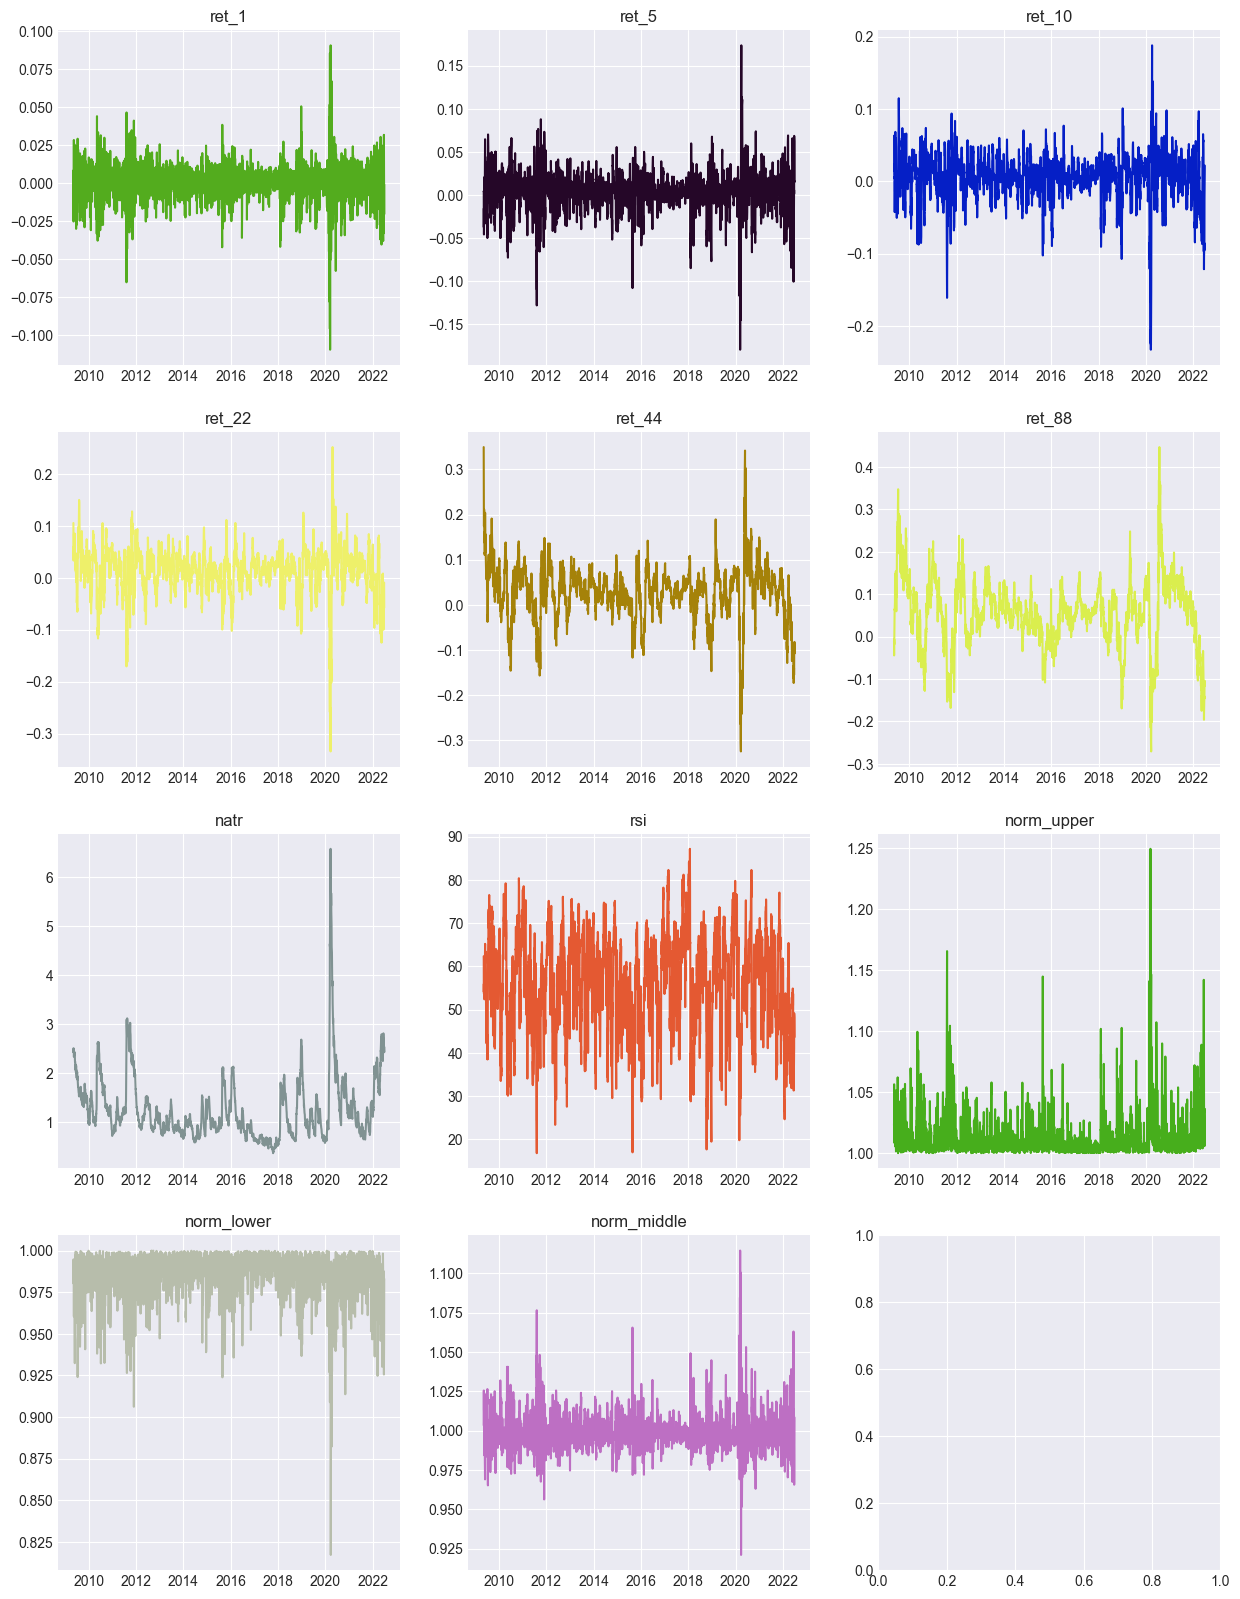

In [8]:
# Get the total count of features
num_of_features = len(features.columns)

# Define the layout and size for subplots
fig, axs = plt.subplots(int(num_of_features/3)+1, 3,
                        figsize=(15, 5*(num_of_features+1)/3))
axs = axs.ravel()

# Loop to plot the individual features
for i in range(num_of_features):
    axs[i].plot(spy[features.columns[i]], color=np.random.rand(3,))
    axs[i].set_title(features.columns[i].replace('f_',''))

plt.show()

<a id='target'></a>
## Define the Target Variable

In the context of forecasting the future returns of the S&P 500 index, represented by the SPY, the target variable would be the 1-day future returns of SPY. 

We will classify the returns in two labels:  0 for negative returns and 1 for positive returns.

The `shift` function helps in shifting the values by n period(s). If the value of n is negative, then it shifts the values backwards and vice-versa.

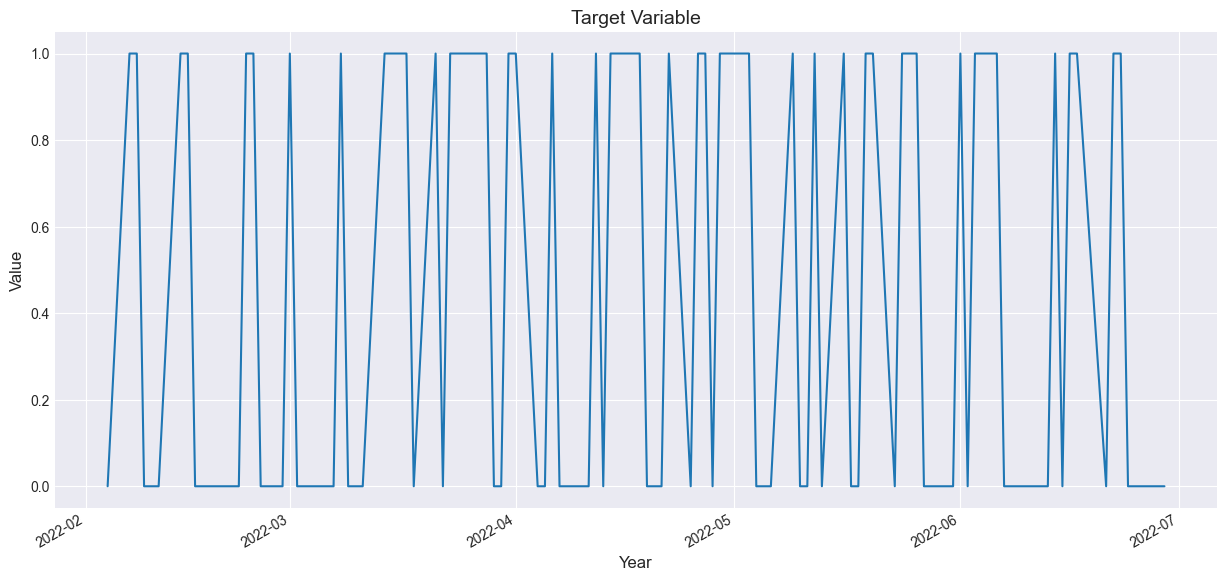

In [9]:
# Create the target variable
spy['return'] = spy.Close.pct_change(1).shift(-1)
spy['target'] = np.where(spy['return'] > 0, 1, 0)

# Plot the target
plt.figure(figsize=(15, 7))
spy.iloc[-100:].target.plot()

# Set the title and axes labels
plt.title('Target Variable', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

### Save the Files on Your Disk

You can run the following code cell in order to store the feature and target data sets to CSV files as we will be using the same in the upcoming notebook.

<b>The following cell will not run in the browser. Download this notebook and convert the cell to "Code" type.</b>

<a id='conclusion'></a>
## Conclusion and Next Steps

You have learnt how to define features and the target variable for your model. In the upcoming notebook, you will learn to use this data and split it into train and test datasets to create your own decision tree classifier model. <br><br>